In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sci
from sklearn.linear_model import LinearRegression
from os import listdir
import pandas as pd

In [18]:
arquivos_dla = [i for i in listdir('./files/') if i[-3:] =='dat']
print(arquivos_dla)

['dla_mode_n_ts_1000_nb_10000_seed_842_.dat', 'dla_mode_n_ts_1_nb_10000_seed_8_.dat', 'particlesmode_n_ts_1000_nb_10000_seed_842_.dat', 'dla_mode_s_ts_1_nb_10000_seed_37_.dat', 'dla_mode_n_ts_10000_nb_10000_seed_400_.dat', 'dla_mode_n_ts_1_nb_10000_seed_104_.dat', 'dla_mode_s_ts_100_nb_10000_seed_666_.dat', 'dla_mode_n_ts_10_nb_10000_seed_64_.dat', 'dla_mode_n_ts_100_nb_10000_seed_42_.dat', 'dla_mode_s_ts_100_nb_10000_seed_302_.dat', 'dla_mode_s_ts_10_nb_10000_seed_315_.dat', 'dla_mode_n_ts_100_nb_10000_seed_171_.dat', 'dla_mode_n_ts_10000_nb_10000_seed_311_.dat', 'dla_mode_n_ts_10_nb_10000_seed_300_.dat', 'dla_mode_n_ts_10000_nb_10000_seed_66_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_141_.dat']


In [40]:
def create_mode(arquivo):
    novo = "./files/particles/" +arquivo[4:]
    with open (novo, "w") as fid:
        with open('./files/'+arquivo) as fid2:
            for row in fid2.readlines():
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])

                for i in range(0,18):
                    fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))
    print("Criou!")

def media(arquivo):
    y = []
    with open(arquivo) as fid:
        for row in fid.readlines():
            row = row.split()
            y.append( int(row[3]))
    y = np.array(y)
    y_,counts = np.unique(y,return_counts=True)
    maior = y_[counts==np.max(counts)][0]
    lenght = np.abs(np.max(y) - np.min(y))
    return maior,lenght

##Section Cross
def secao(med,leght,arquivo):
    print(med)
    print("legth: %d" %leght)
    x = []
    z = []

    with open(arquivo) as fid:
        for row in fid.readlines():
            row = row.split()
            y = int(row[3])

            if y == med:
                x.append(int(row[2]))
                z.append(int(row[4]))
                plt.plot(int(row[2]), int(row[4]),'rs')
                
    plt.show()
    return x,z

def Raio(x,z):
    x = np.array(x)
    z = np.array(z)
    xcent = np.mean(x)
    zcent = np.mean(z)
    centro = np.array([xcent,zcent]*len(x)).reshape(-1,2)
    pontos = np.vstack([np.array(x),np.array(z)]).T
    distancia = np.sqrt(np.sum((centro-pontos)*(centro-pontos),axis = 1))
    r = np.max(distancia)
    return r,xcent,zcent

def fractal(r,x,z,xcent,zcent,arquivo):
    ## frac dimension 
    n = 100
    v = np.linspace(5,r,n)
    cont = np.zeros(n)
    for j in range(0,len(v)):
        c = 0
        for i in range(0,len(x)):
            ri = m.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= v[j]:
                c += 1
                cont[j] = c
    #r = 0
    R = 0
    min = np.log(v[0])
    max = np.log(v[-1])
    v = np.log(v).reshape(-1,1)
    cont = np.log(cont).reshape(-1,1)
    j = 0
    for i in range(10,len(v)):
        reg = LinearRegression().fit(v[:i], cont[:i])
        r2 = reg.score(v[:i], cont[:i])
        if(r2>R):
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(v[:j], cont[:j])
    print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.linspace(min,max,2000) + reg.intercept_
    plt.figure(figsize = (8,8))
    plt.plot(v, cont, 'o--',color='darkslategray')
    plt.plot(np.linspace(min,max,2000), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
    plt.legend()
    plt.savefig("./img/"+arquivo[:-3] + 'jpg', dpi=400)
    plt.show()

    pontos = np.linspace(0,2*np.pi,2000)
    x_ = xcent+r*np.cos(pontos)
    y_ = zcent+r*np.sin(pontos)

    plt.figure(figsize=(8,8))
    #plt.grid()
    plt.plot([xcent],[zcent],'s',color='darkorange',zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados') # Dados
    plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    plt.legend()
    plt.savefig("img/"+arquivo[:-4]+"_fractal.jpg", dpi=400)
    plt.show()


In [32]:
for arquivo in arquivos_dla:
    create_mode(arquivo)

dla_mode_n_ts_1000_nb_10000_seed_842_.dat
Criou!
dla_mode_n_ts_1_nb_10000_seed_8_.dat
Criou!
particlesmode_n_ts_1000_nb_10000_seed_842_.dat
Criou!
dla_mode_s_ts_1_nb_10000_seed_37_.dat
Criou!
dla_mode_n_ts_10000_nb_10000_seed_400_.dat
Criou!
dla_mode_n_ts_1_nb_10000_seed_104_.dat
Criou!
dla_mode_s_ts_100_nb_10000_seed_666_.dat
Criou!
dla_mode_n_ts_10_nb_10000_seed_64_.dat
Criou!
dla_mode_n_ts_100_nb_10000_seed_42_.dat
Criou!
dla_mode_s_ts_100_nb_10000_seed_302_.dat
Criou!
dla_mode_s_ts_10_nb_10000_seed_315_.dat
Criou!
dla_mode_n_ts_100_nb_10000_seed_171_.dat
Criou!
dla_mode_n_ts_10000_nb_10000_seed_311_.dat
Criou!
dla_mode_n_ts_10_nb_10000_seed_300_.dat
Criou!
dla_mode_n_ts_10000_nb_10000_seed_66_.dat
Criou!
dla_mode_n_ts_1000_nb_10000_seed_141_.dat
Criou!


In [33]:
arquivos_mode = [i for i in listdir('./files/particles/') if i[-3:] =='dat']
print(arquivos_mode)

['mode_n_ts_10000_nb_10000_seed_66_.dat', 'mode_n_ts_1000_nb_10000_seed_842_.dat', 'mode_n_ts_100_nb_10000_seed_42_.dat', 'mode_n_ts_10_nb_10000_seed_300_.dat', 'mode_n_ts_10000_nb_10000_seed_311_.dat', 'mode_n_ts_10000_nb_10000_seed_400_.dat', 'mode_s_ts_10_nb_10000_seed_315_.dat', 'mode_n_ts_100_nb_10000_seed_171_.dat', 'mode_n_ts_1000_nb_10000_seed_141_.dat', 'mode_s_ts_100_nb_10000_seed_666_.dat', 'mode_n_ts_1_nb_10000_seed_104_.dat', 'mode_s_ts_1_nb_10000_seed_37_.dat', 'mode_n_ts_10_nb_10000_seed_64_.dat', 'mode_n_ts_1_nb_10000_seed_8_.dat', 'mode_s_ts_100_nb_10000_seed_302_.dat']


-4
legth: 2608


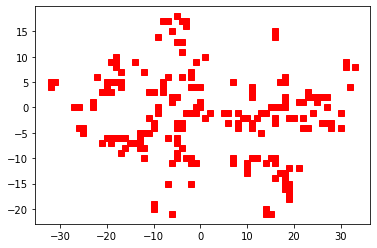

[[2.04569015]] [-1.02649231]


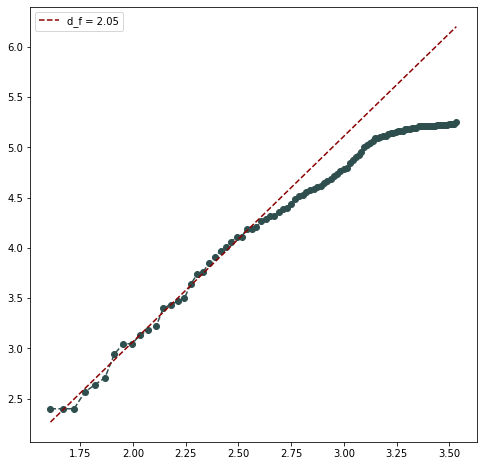

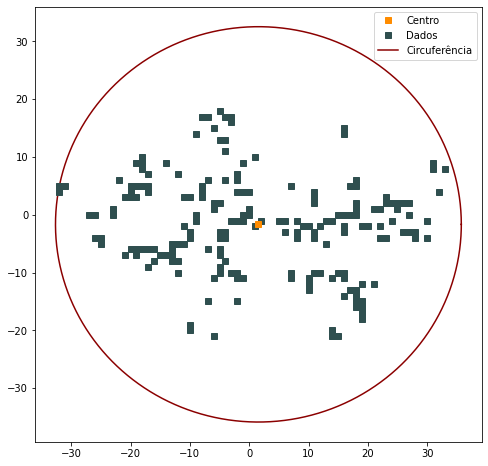

12
legth: 2460


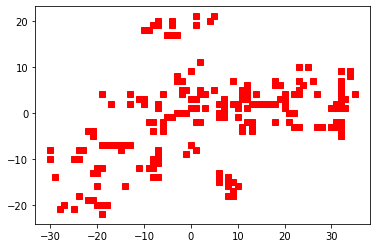

[[1.7597082]] [-0.17609991]


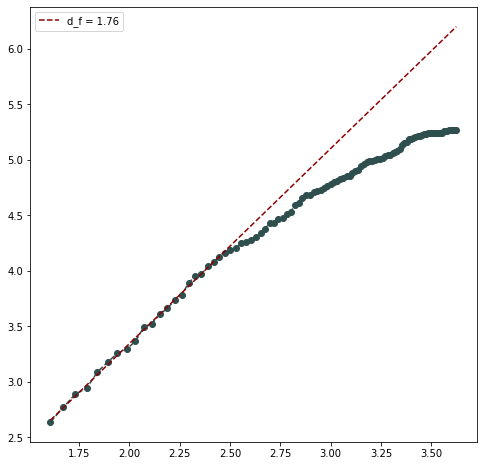

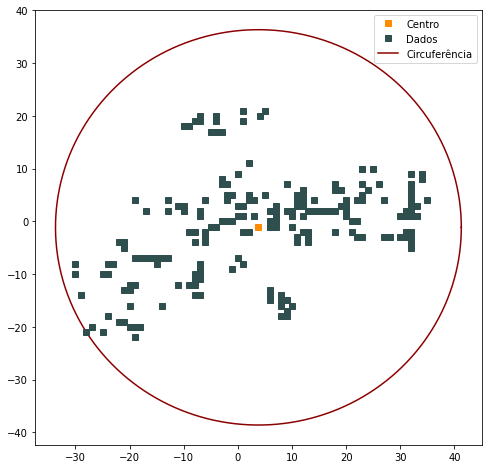

97
legth: 2511


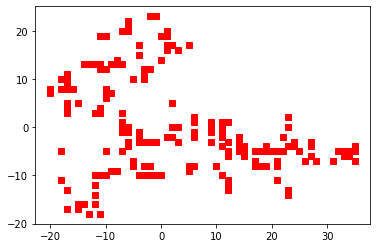

[[1.8844472]] [-0.78381178]


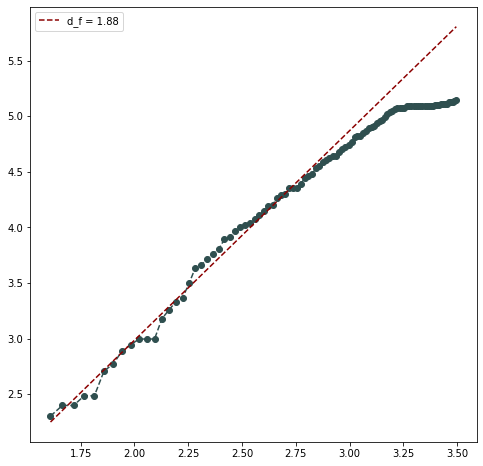

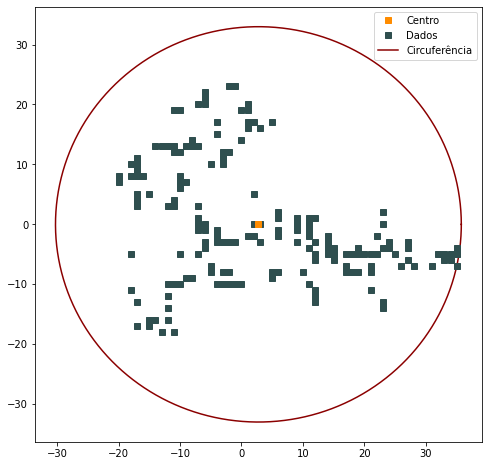

76
legth: 2714


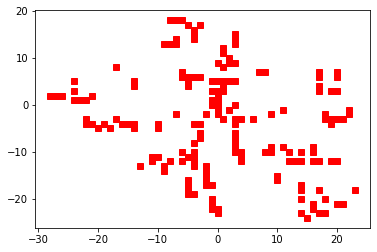

[[1.45903797]] [0.50135286]


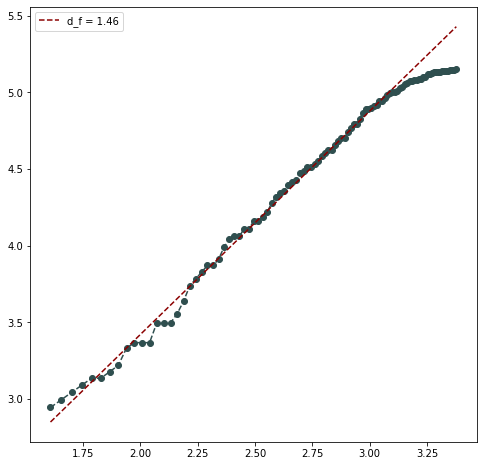

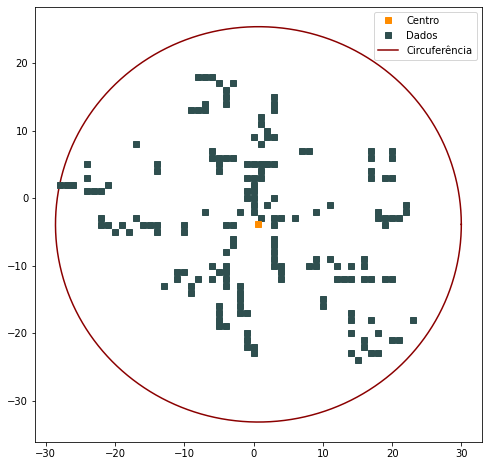

-20
legth: 2333


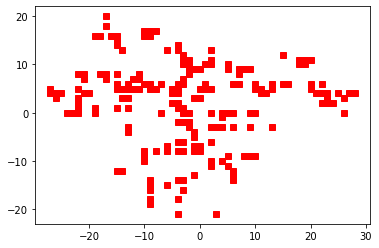

[[1.6278147]] [0.37479068]


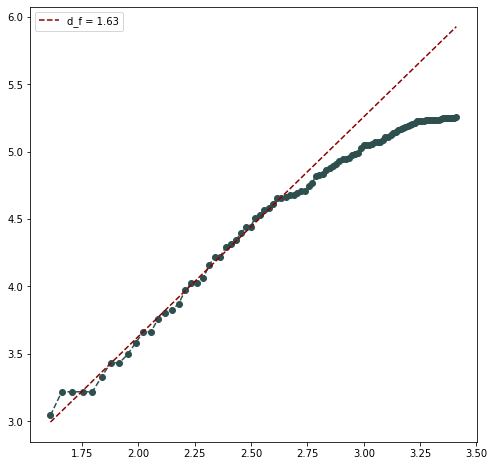

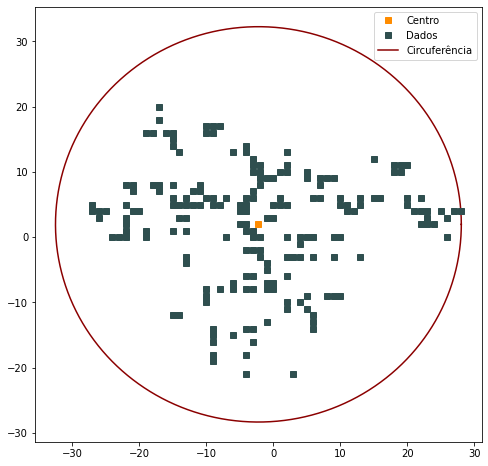

22
legth: 2565


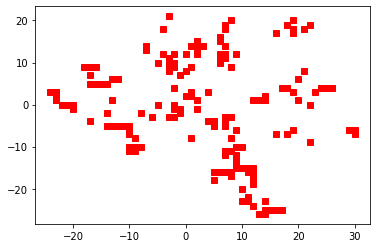

[[1.61210966]] [-0.17001933]


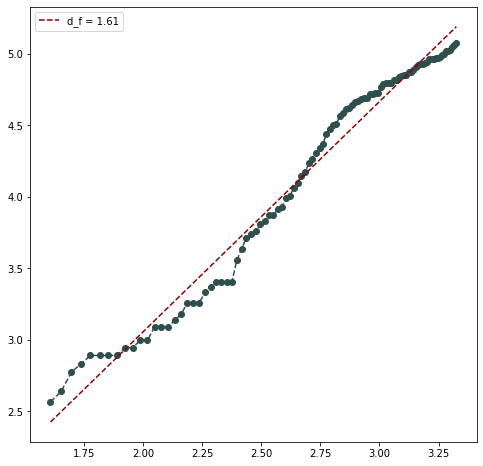

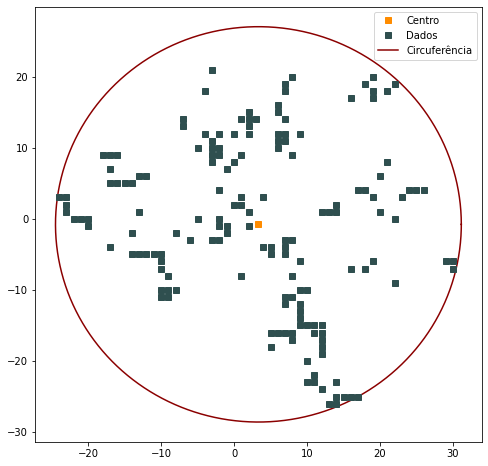

-17
legth: 2205


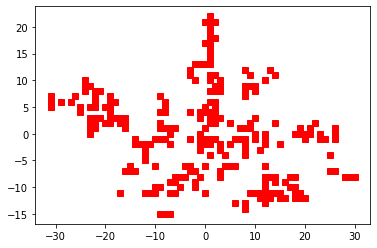

[[1.63494599]] [0.52120478]


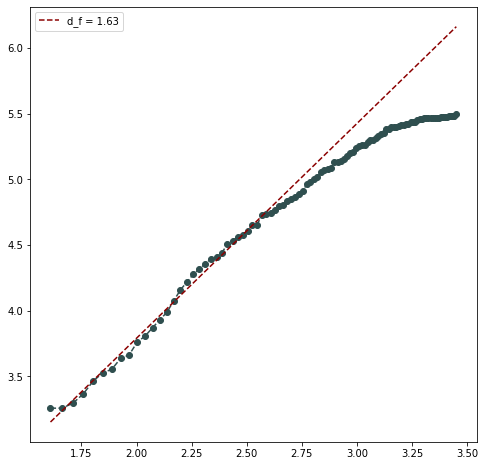

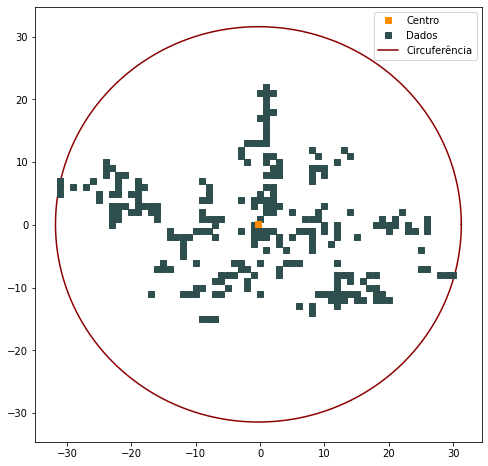

-2
legth: 2315


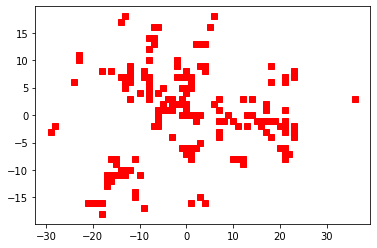

[[1.18650036]] [1.28953389]


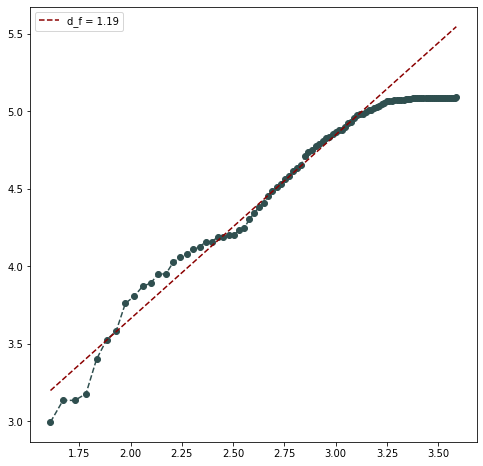

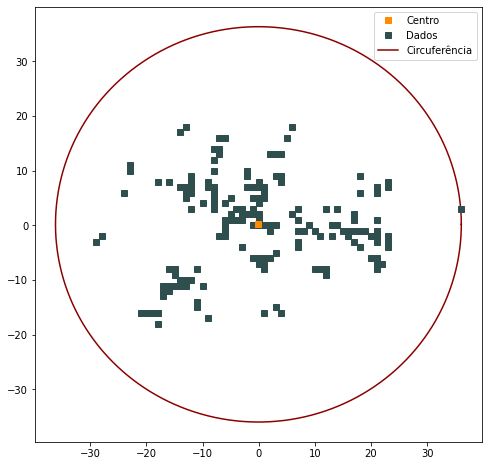

-44
legth: 2661


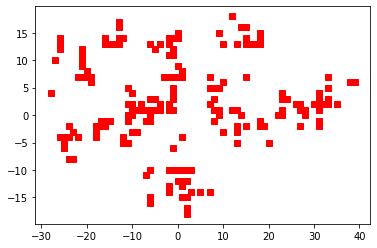

[[2.67966267]] [-2.17674295]


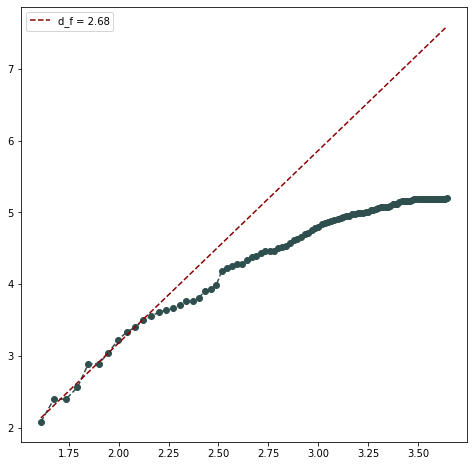

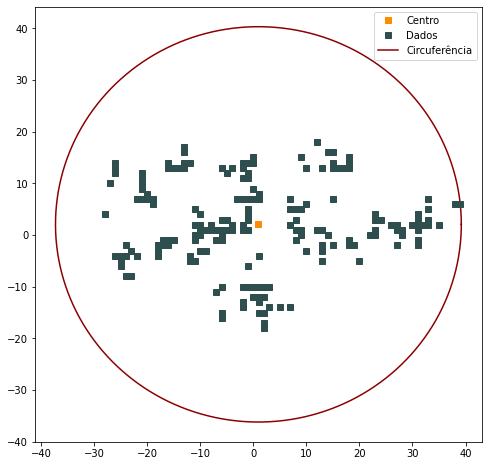

-101
legth: 2109


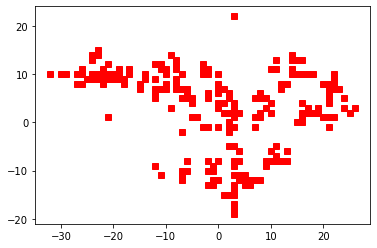

[[1.41383522]] [0.79766107]


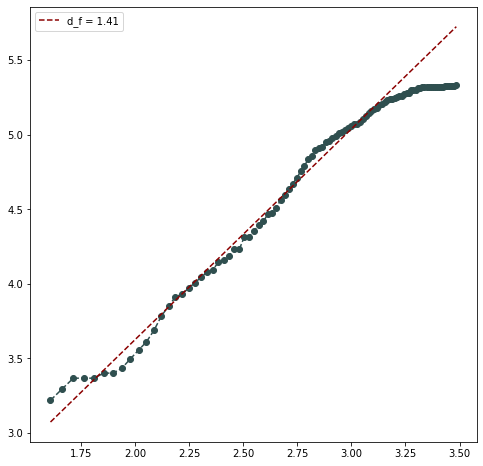

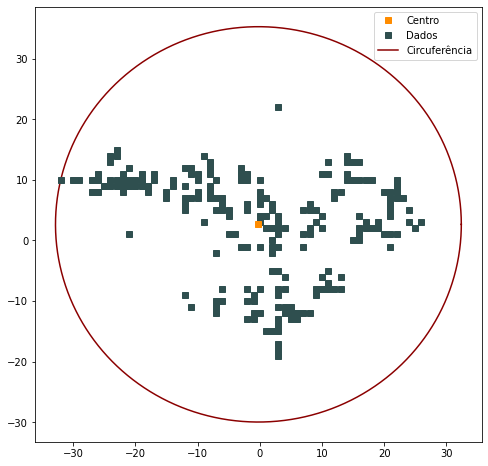

-76
legth: 2439


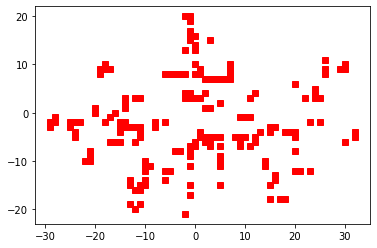

[[1.71036266]] [-0.15303293]


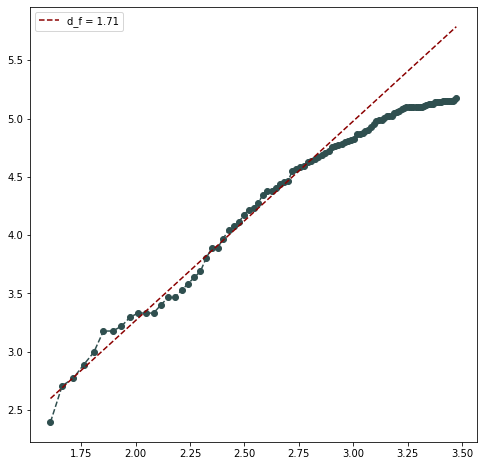

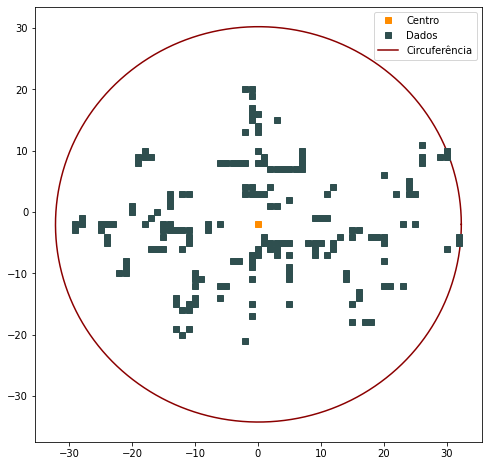

7
legth: 2325


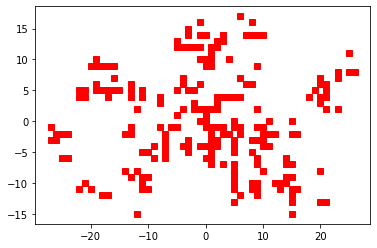

[[1.33873046]] [1.25499311]


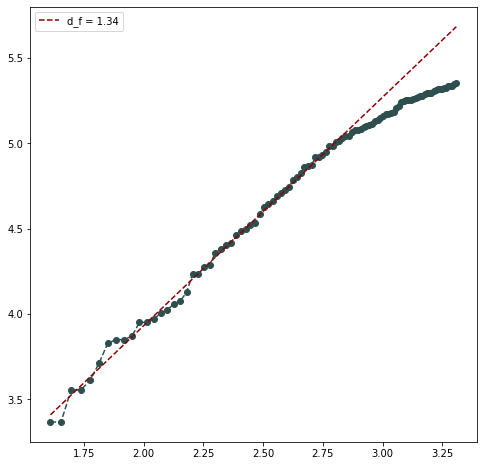

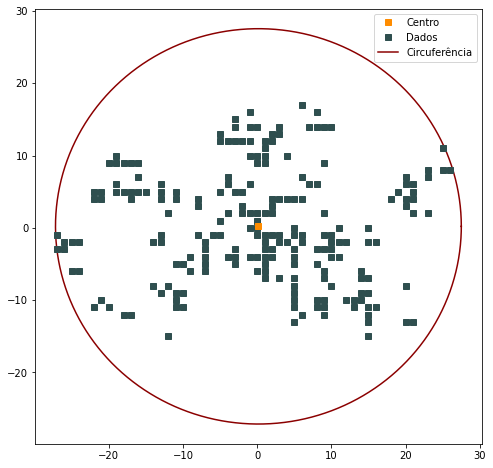

-41
legth: 2472


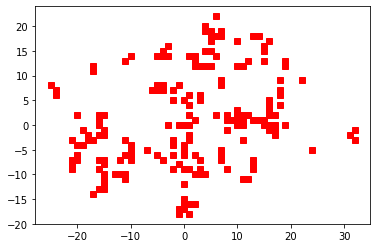

[[1.77503674]] [-0.29027158]


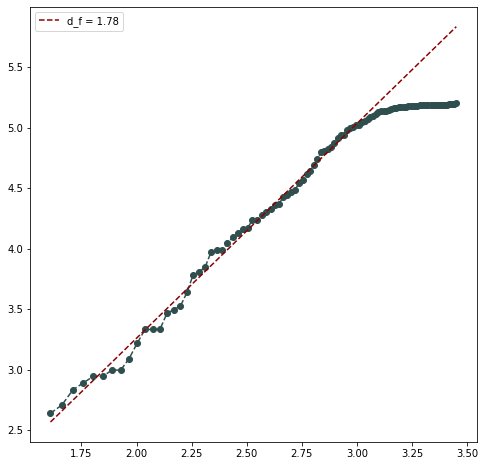

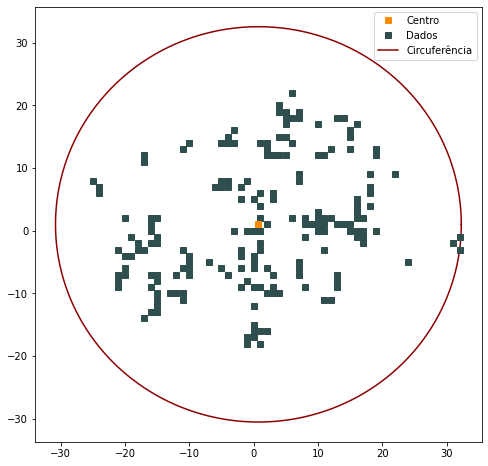

-41
legth: 2408


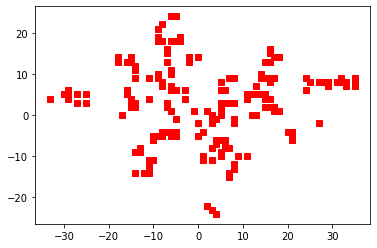

[[1.74751595]] [-0.33182186]


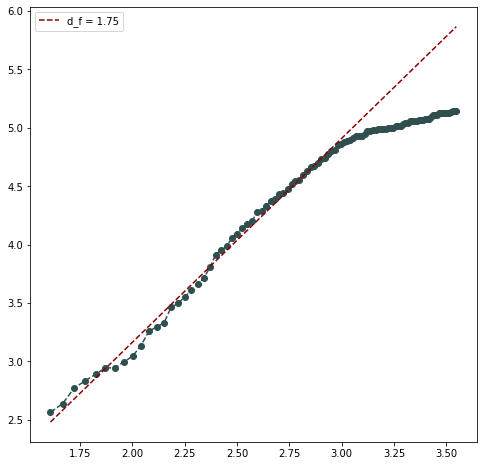

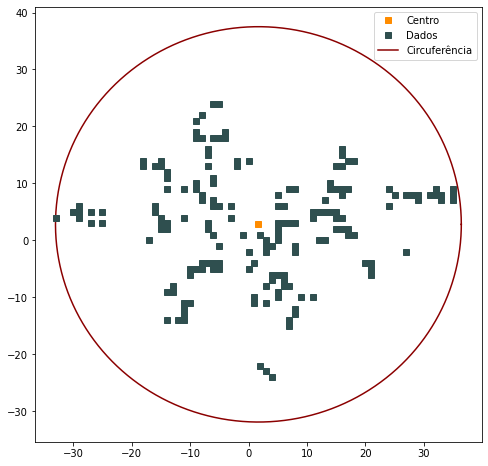

-65
legth: 2209


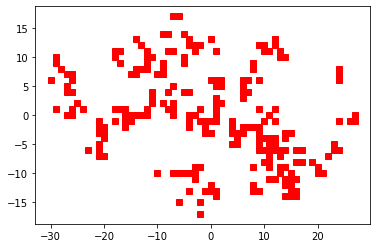

[[1.75341264]] [0.0243746]


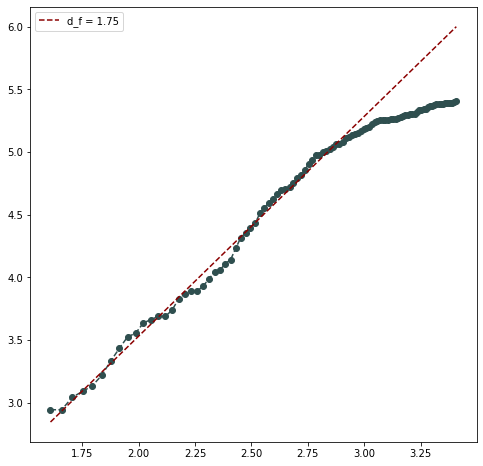

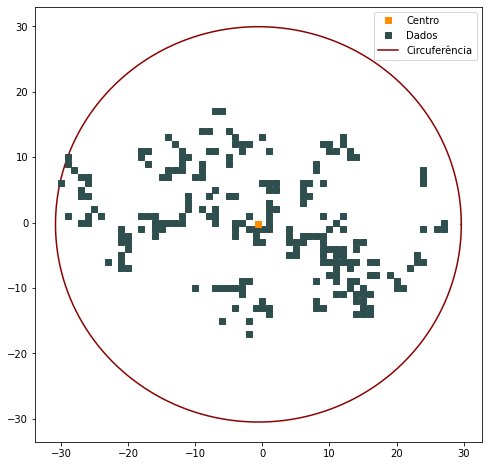

In [41]:
for arquivo in arquivos_mode:
    arquivo_ = './files/particles/'+arquivo
    med,length = media(arquivo_)
    x, z = secao(med,length, arquivo_)
    r,xcent,zcent = Raio(x,z)
    fractal(r,x,z,xcent,zcent,arquivo)

(array([1, 2, 3]), array([6, 4, 2]))


[12]
legth: 2460


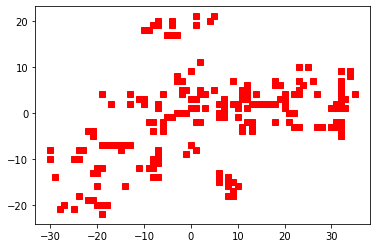

37.477177100454135


[[1.7597082]] [-0.17609991]


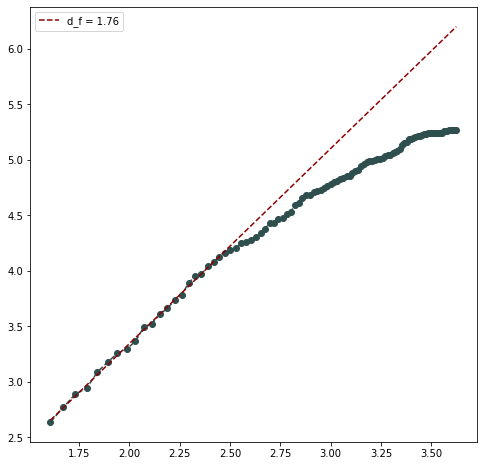

0.9301151158866243

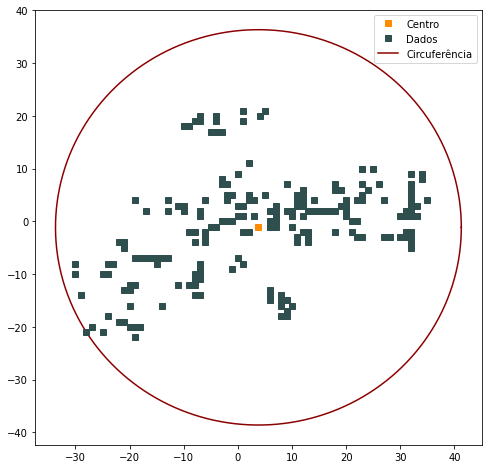

In [111]:
centro = np.array([xcent,zcent]*len(x)).reshape(-1,2)
pontos = np.vstack([np.array(x),np.array(z)]).T

In [92]:
np.dot(centro-pontos,centro-pontos)

ValueError: shapes (134,2) and (134,2) not aligned: 2 (dim 1) != 134 (dim 0)

In [122]:
maior = np.arange(0,len(x),1)[distancia==max(distancia)]

In [124]:
r 

27.65863337187866

In [117]:
distancia 

array([ 5.,  9.,  9.,  8.,  8., 12., 12.,  7.,  7.,  6.,  5.,  7.,  8.,
       16., 15.,  3.,  3., 16., 10., 14.,  6.,  2.,  4., 15., 15.,  4.,
       13.,  7.,  9.,  8., 16., 11.,  8.,  8., 14., 16.,  5.,  9.,  7.,
        8.,  2., 10., 13., 11.,  4., 17., 17., 11., 10., 11.,  5., 21.,
       10., 18., 11.,  6., 18., 17., 10.,  8., 13., 18.,  9., 10., 18.,
       14., 11., 11., 21., 17., 12., 19., 20., 18., 11., 14., 13., 18.,
       25., 20., 12., 18., 11., 19., 30., 31., 21., 32., 13., 21., 16.,
       13., 17., 14., 21., 25., 20., 10., 13., 23., 15., 20., 28., 25.,
       38., 22., 24., 39., 26., 25., 29., 22., 32., 22., 22., 15., 20.,
       21., 38., 23., 23., 31., 26., 21., 13., 25., 21., 37., 32., 30.,
       16., 24., 31., 28.])